In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta 
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

**Reading output Data CSV**

In [3]:
input_dir = './output_data_cluster/'
# 201808_with_pickup_return_5.csv
month = '201808'
input_file_name = input_dir+month+'_with_pickup_return_4.csv'
data = pd.read_csv(input_file_name, sep = ",")
pick_columns = ['p0-1', 'p1-2','p2-3','p3-4','p4-5','p5-6','p6-7','p7-8','p8-9','p9-10','p10-11',
                       'p11-12','p12-13','p13-14','p14-15','p15-16','p16-17','p17-18','p18-19','p19-20',
                       'p20-21','p21-22','p22-23','p23-0']
return_columns = ['r0-1', 'r1-2','r2-3','r3-4','r4-5','r5-6','r6-7','r7-8','r8-9',
                  'r9-10','r10-11','r11-12','r12-13','r13-14','r14-15','r15-16','r16-17',
                  'r17-18','r18-19','r19-20','r20-21','r21-22','r22-23','r23-0']

In [4]:
avg = data[['Cluster Label']+pick_columns+return_columns].groupby('Cluster Label').mean()
avg

,p0-1,p1-2,p2-3,p3-4,p4-5,p5-6,p6-7,p7-8,p8-9,p9-10,...,r14-15,r15-16,r16-17,r17-18,r18-19,r19-20,r20-21,r21-22,r22-23,r23-0
Cluster Label,,,,,,,,,,,,,,,,,,,,,
0,3.117647,1.808824,0.911765,0.573529,1.000000,1.911765,5.676471,13.970588,26.735294,23.632353,...,28.161765,28.691176,32.235294,42.352941,32.750000,18.544118,13.897059,10.147059,7.573529,4.602941
1,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.500000,1.500000,...,2.000000,0.500000,0.500000,1.000000,1.500000,1.000000,0.000000,0.000000,0.500000,0.000000
2,6.471698,4.169811,2.811321,1.459119,1.867925,9.364780,30.301887,69.251572,87.037736,37.150943,...,26.446541,31.698113,46.000000,82.899371,85.226415,63.056604,45.358491,31.855346,24.213836,15.691824
3,1.102564,0.717949,0.384615,0.205128,0.871795,4.230769,15.897436,36.641026,69.487179,22.846154,...,9.076923,10.666667,21.205128,50.384615,46.179487,26.769231,15.692308,10.589744,8.435897,4.564103
4,5.617450,2.832215,1.476510,0.798658,0.966443,4.926174,19.120805,43.879195,74.832215,49.053691,...,42.469799,49.355705,64.053691,96.389262,85.442953,57.583893,38.993289,26.892617,21.395973,11.107383


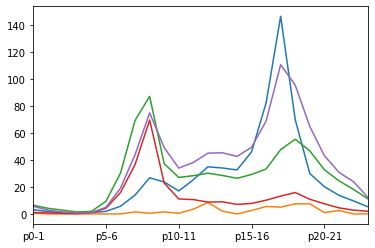

In [5]:
for i in range(5):
    row = avg[pick_columns].iloc[i]
    row.plot(kind='line')

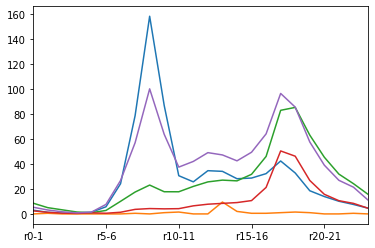

In [6]:
for i in range(5):
    row = avg[return_columns].iloc[i]
    row.plot(kind='line')

In [9]:
# 201808_scaled5
input_file_name = input_dir+month+'_scaled5.csv'
data = pd.read_csv(input_file_name, sep = ",")
avg = data[['Cluster Label']+pick_columns+return_columns].groupby('Cluster Label').mean()
avg

,p0-1,p1-2,p2-3,p3-4,p4-5,p5-6,p6-7,p7-8,p8-9,p9-10,...,r14-15,r15-16,r16-17,r17-18,r18-19,r19-20,r20-21,r21-22,r22-23,r23-0
Cluster Label,,,,,,,,,,,,,,,,,,,,,
0,0.003925,0.002375,0.001249,0.000676,0.004934,0.002882,0.009648,0.023442,0.040933,0.031194,...,0.033190,0.034580,0.036404,0.052958,0.047304,0.026312,0.018772,0.014840,0.008994,0.005172
1,0.009434,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031915,0.010638,0.030711,...,0.051282,0.012821,0.012821,0.025641,0.038462,0.025641,0.000000,0.000000,0.012821,0.000000
2,0.005981,0.003377,0.002385,0.001740,0.002548,0.012731,0.045279,0.110895,0.129606,0.068104,...,0.041510,0.048897,0.070386,0.126878,0.145800,0.105358,0.073546,0.046933,0.033917,0.023612
3,0.003437,0.002253,0.000903,0.000663,0.004762,0.014229,0.055023,0.140797,0.268023,0.088634,...,0.027018,0.048865,0.092336,0.231419,0.198330,0.100735,0.058427,0.037890,0.025652,0.013808
4,0.005416,0.003160,0.001336,0.000868,0.001519,0.005605,0.019368,0.046254,0.075224,0.056408,...,0.046278,0.052020,0.064631,0.099957,0.095847,0.068973,0.044289,0.028886,0.019524,0.010763


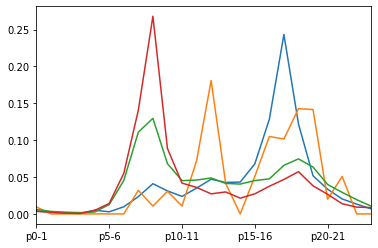

In [10]:
for i in range(4):
    row = avg[pick_columns].iloc[i]
    row.plot(kind='line')

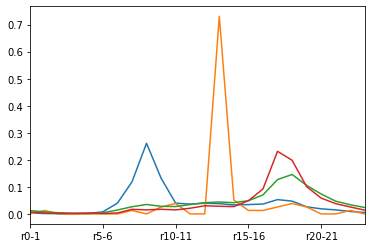

In [11]:
for i in range(4):
    row = avg[return_columns].iloc[i]
    row.plot(kind='line')